# Overview


The notebook explains the teams work on binary classification of dataset providing attributes of the tumour through different techniques.

**Team Details**

Team Name: Group 20

Team Members:

> Francis Sunny

> Goutam Briju Chhabria

> Janith Chandra Valluri

> Maria Chiara Vernillo

> Sanath Kumar Nedunuri

> Viktoriia Khelemska

The task was achieved through a non deep learning method and two different deep learning method and the result of the methods were compared to come up with a best model.

Non Deep Learning Model: **Random Forest Classifier**

Dense ANN: **3 Layer ANN**

Wide and Deep Neural Network: **5 Layer ANN**

Out of the 3 models implented the Wide and Deep Neural Network was having a best performance.

# Model and Method

## Analysing The Dataset

### Importing Libraries

In [ ]:
# Libraries used for visualisation
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
from ann_visualizer.visualize import ann_viz
import graphviz
import plotly.express as px
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassificationReport, ClassPredictionError

# Libraries used for Data Processing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Libraries used for feature selection
from sklearn.feature_selection import f_classif

# Libraries used for model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Libraries used for modelling
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier

# Libraries used for calculating the Model Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

#Tensorflow.jstf.Sequential class.fit () method is used to train the model for the fixed number of epochs. 
#In a sequential model, the input flows directly to the output. 
from tensorflow.keras.models import Sequential 
#The dense method is used to create fully connected layers, in which every output depends on every input.
from tensorflow.keras.layers import Dense
#Adam: an optimiser that implements the Adam algorithm.
#This automatically adapts a learning rate for each of input variables for the objective function 
#and helps smoothing the search by means of an exponentially decreasing moving average of the gradient to make update the variables.
from tensorflow.keras.optimizers import Adam
from tensorflow.python.ops.array_ops import zeros

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

### Loading data

In [ ]:
df = pd.read_csv('train_100r.csv')

### Checking For Unwanted/Empty Values

In [3]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

We see that there is no missing value in the dataset.

### Checking for Outliers

In [4]:
df.describe()

id     diagnosis   radius_mean  texture_mean  perimeter_mean  \
count  25524.000000  25524.000000  25524.000000  25524.000000    25524.000000   
mean   12761.500000      0.499843     12.587571     18.797795       97.909665   
std     7368.288472      0.500010      3.503795      5.360127       27.442430   
min        0.000000      0.000000      3.191287      5.996412       36.261743   
25%     6380.750000      0.000000      9.869745     14.779183       78.418036   
50%    12761.500000      0.000000     12.091910     18.227065       91.881158   
75%    19142.250000      1.000000     14.924692     22.241400      111.462838   
max    25523.000000      1.000000     31.654623     37.532992      196.268248   

          area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count  25524.000000     25524.000000      25524.000000    25524.000000   
mean     670.853706         0.106022          0.145079        0.150999   
std      389.374163         0.017768          0.074372        0.129404   
min       13.066939         0.041578          0.006820        0.000004   
25%      402.636524         0.093072          0.088716        0.036953   
50%      555.694186         0.105574          0.132074        0.118348   
75%      838.174559         0.119046          0.181743        0.240190   
max     3686.006697         0.182599          0.384272        0.572661   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count         25524.000000  ...  25524.000000   25524.000000     25524.000000   
mean              0.084847  ...     20.061470      23.071630       134.652917   
std               0.058930  ...      6.695670       6.030421        45.550691   
min               0.000009  ...      7.365272       8.120317        52.469394   
25%               0.032673  ...     14.850159      18.678515        99.388127   
50%               0.079349  ...     17.713607      22.510936       115.464171   
75%               0.121400  ...     25.330763      26.852011       172.313135   
max               0.261141  ...     40.339293      47.762364       290.031452   

         area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count  25524.000000      25524.000000       25524.000000     25524.000000   
mean     925.856172          0.114559           0.175136         0.348091   
std      566.589369          0.024297           0.144550         0.237368   
min        2.476110          0.038316           0.000019         0.000024   
25%      514.927885          0.096844           0.073974         0.162795   
50%      759.650384          0.113319           0.137480         0.304954   
75%     1259.557683          0.129747           0.234840         0.484126   
max     4386.880701          0.262451           1.085080         1.308318   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count          25524.000000    25524.000000             25524.000000  
mean               0.166719        0.343439                 0.098569  
std                0.089293        0.082335                 0.024277  
min                0.000061        0.112617                 0.052574  
25%                0.090028        0.290525                 0.082560  
50%                0.156044        0.331700                 0.091055  
75%                0.246340        0.375807                 0.109395  
max                0.362273        0.661336                 0.181523  

[8 rows x 32 columns]

The max value column 'area_mean' seems to have a much higher value 3686.006697, whereas a susceptible measure is around 700. Hence the presence of some outliers in this column can be identified.

#### Visualising the Outliers

In [5]:
fig = px.histogram(df, x='area_mean')
fig.show()

As detected in the EDA, area_mean contains outliers. These outliers in the data will be dropped before further processing the data.

#### Removing **Outliers**

In [6]:
Q1 = np.percentile(df['area_mean'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['area_mean'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

upper_bound = np.where(df['area_mean'] >= (Q3 + 1.5*IQR))
lower_bound = np.where(df['area_mean'] <= (Q1 - 1.5*IQR))

df.drop(upper_bound[0], inplace=True)
df.drop(lower_bound[0], inplace=True)

df.shape

(24508, 32)

It can be seen that the number of rows of the dataset got reduced confirming the removal of outliers.

#### Removing Non Value add column

It is clear from the data overview, the column 'id' doesnt give any value add in determining the target variable. Hence this column will be removed.

In [7]:
df.drop(['id'], axis=1, inplace=True)

### Features Selection and Train-Test Split

To select the best features from the whole dataset, different types(pearson, spearman, kendall) of correlation between the target and features are calculated and sorted in the descending order. This is done so as to get a clear vision about the correlation between the features and get the top correlated features.

In [8]:
pearson = df.corr()["diagnosis"] # Pearson is default
spearman= df.corr(method='spearman')["diagnosis"]
kendall = df.corr(method='kendall')["diagnosis"]

print("Pearson Correlation")
print(pearson.sort_values(ascending=False))
print("---------------------------")
print("Spearman Correlation")
print(spearman.sort_values(ascending=False))
print("---------------------------")
print("Kendall Correlation")
print(kendall.sort_values(ascending=False))
print("---------------------------")

Pearson Correlation
diagnosis                  1.000000
concavity_mean             0.751403
concave points_worst       0.721934
perimeter_worst            0.700748
concave points_mean        0.689320
radius_worst               0.642242
area_worst                 0.598267
perimeter_se               0.595353
compactness_mean           0.575636
area_mean                  0.536495
concavity_worst            0.493199
area_se                    0.486449
radius_mean                0.470365
perimeter_mean             0.469938
radius_se                  0.442660
symmetry_mean              0.423680
smoothness_mean            0.423234
concavity_se               0.371503
fractal_dimension_worst    0.365247
compactness_worst          0.344735
compactness_se             0.325566
concave points_se          0.323104
fractal_dimension_se       0.296883
texture_mean               0.294443
symmetry_worst             0.228399
texture_worst              0.197982
symmetry_se                0.186759
fractal_

On checking the output from the different correlation types it seems that the same order is maintained in the correlation level of each features.


As the task here is binary classification, an Anova (Analysis of 
Variance) is carried out to find out the significance level of each features with target.

In [9]:
f = f_classif(df.drop('diagnosis', axis=1), df['diagnosis'])
p_values=pd.Series(f[1])

print("################################")
print("The p-values are: ")
print(p_values.sort_values(ascending=True))
print("################################")
print("At the 1% significance level:")
print(str(p_values<=0.01))
print("----------------")
print("At the 5% significance level:")
print(str(p_values<=0.05))
print("----------------")
print("At the 10% significance level:")
print(str(p_values<=0.1))

################################
The p-values are: 
0      0.000000e+00
27     0.000000e+00
26     0.000000e+00
25     0.000000e+00
23     0.000000e+00
22     0.000000e+00
20     0.000000e+00
19     0.000000e+00
17     0.000000e+00
16     0.000000e+00
15     0.000000e+00
13     0.000000e+00
29     0.000000e+00
10     0.000000e+00
8      0.000000e+00
7      0.000000e+00
6      0.000000e+00
12     0.000000e+00
5      0.000000e+00
4      0.000000e+00
1      0.000000e+00
3      0.000000e+00
2      0.000000e+00
28    1.775074e-287
21    4.270801e-215
18    3.286644e-191
9      3.559969e-77
11     1.651339e-70
14     3.841173e-42
24     8.634168e-08
dtype: float64
################################
At the 1% significance level:
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    

After having noticed that all the features have a statistically significant relationship with the target variable (coefficient statistically significant from zero), the features with the lowest correlation with the target variable can be dropped, albeit the risk to drop variables that, in actual terms, have a causal effect on the diagnosis.

#### Selecting Best 10 Correlated Features

In [10]:
corr = df.corr().abs()['diagnosis'].sort_values(ascending=False)
df = df.loc[:, corr[:10].index]

#### Splitting the Dataset to Target and Features

In [11]:
# We drop the dependent variable from the dataset of features.
x = df.drop('diagnosis', axis=1)
# And isolate it. 
y = df.diagnosis

#### Splitting the Dataset to Test and Train

**Train - Test ratio**: 70 -30

In [12]:
#We split the x and y datasets into train and test using a 70-30 split and a random state of 42.

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)

#### Data Scaling

In [13]:
# We now scale our features using a standard scaler, which removes the mean and scales to unit variance.
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

## Benchmark Model: Random Forest Classifier

The first instinct, having a binary target, using a logistic regression would have seemed the best option. However, following Macaulay et al (2021)[1] in the application of a Random Forest Classifier in the context of Breast Cancer Diagnosis, due to more flexibility in the classification of the results (1 or 0 vs a probability that a certain observation would be 1). Moreover, RFC can be immune to redundant variables or variables that are highly inter-correlated, which could lead to overfitting when other algorithms are applied (Kirasich et al, 2018)[2]. This could be a problem in this task, since, as it is seen in the exploratory part, correlation between explanatory variables is present.


Random forest classifier is used with GridSearchCV in order to find the best hyperparameters for the model.

## Dense ANN


> Sequential Model with 9 inputs

> 3 Layers

*   Layer 1
    * **kernel_initializer**: he_uniform
    * **Nodes**: 100
    * **Activation**: relu 

*   Layer 2
    * **kernel_initializer**: he_uniform
    * **Nodes**: 10
    * **Activation**: relu

*   Layer 3
    * **kernel_initializer**: glorot_uniform
    * **Nodes**: 1
    * **Activation**: hard_sigmoid

> Bias: None

> Optimizer: Adam

> Loss function: LogCosh

> Metrics: BinaryAccuracy







## Wide and Deep ANN

> Sequential Model with 9 inputs

> 5 Layers

*   Layer 1
    * **kernel_initializer**: he_normal
    * **Bias Initialiser**: zeros
    * **Nodes**: 100
    * **Activation**: relu 

*   Layer 2
    * **kernel_initializer**: he_normal
    * **Bias Initialiser**: zeros
    * **Nodes**: 75
    * **Activation**: relu

*   Layer 3
    * **kernel_initializer**: he_normal
    * **Bias Initialiser**: zeros
    * **Nodes**: 50
    * **Activation**: relu

*   Layer 4
    * **kernel_initializer**: glorot_normal
    * **Bias Initialiser**: zeros
    * **Nodes**: 25
    * **Activation**: relu

*   Layer 5
    * **kernel_initializer**: lecun_normal
    * **Bias Initialiser**: zeros
    * **Nodes**: 1
    * **Activation**: sigmoid

> Optimizer: Adam

> Loss function: LogCosh

> Metrics: BinaryAccuracy


# Training and Validating

## Modelling Using Random Forest Classifier



### Training

The model created is trained with the train data we obtained from train test split.

In [14]:
depth = [3, 9, 81]
estimators = [50, 100, 200]
params = dict(max_depth=depth, n_estimators=estimators)

random_forest = RandomForestClassifier(n_estimators=estimators, max_depth=depth)
GSCV = GridSearchCV(estimator=random_forest, param_grid=params, cv = 5)
res = GSCV.fit(xtrain, ytrain)

print(f"Use {res.best_params_}")

Use {'max_depth': 81, 'n_estimators': 200}


In [15]:
rfc = RandomForestClassifier(n_estimators=res.best_params_['n_estimators'], max_depth=res.best_params_['max_depth'], random_state = 42)
rfc = rfc.fit(xtrain, ytrain) 

### Testing

The trained model is then used to do the prediction on test data obtained from train test split.

In [16]:
y_pred_rfc = rfc.predict(xtest)
y_pred_rfc_proba = rfc.predict_proba(xtest)

### Model Evaluation

Based on the prediction on the test data the performance of the model is evaluated.

In [17]:
#The accuracy.
rfc_score = accuracy_score(ytest, y_pred_rfc)
rfc_loss = log_loss(ytest,y_pred_rfc_proba)
print(f"The accuracy score is:  {rfc_score}")
print(f'The log loss is: {rfc_loss}')

The accuracy score is:  0.9734802121583027
The log loss is: 0.08545387870507773


With the Random Forest Classifier an Accuracy Score of 0.97 is achieved:

In [18]:
print(classification_report(ytest, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3798
           1       0.97      0.97      0.97      3555

    accuracy                           0.97      7353
   macro avg       0.97      0.97      0.97      7353
weighted avg       0.97      0.97      0.97      7353



/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning:

could not determine class_counts_ from previously fitted classifier



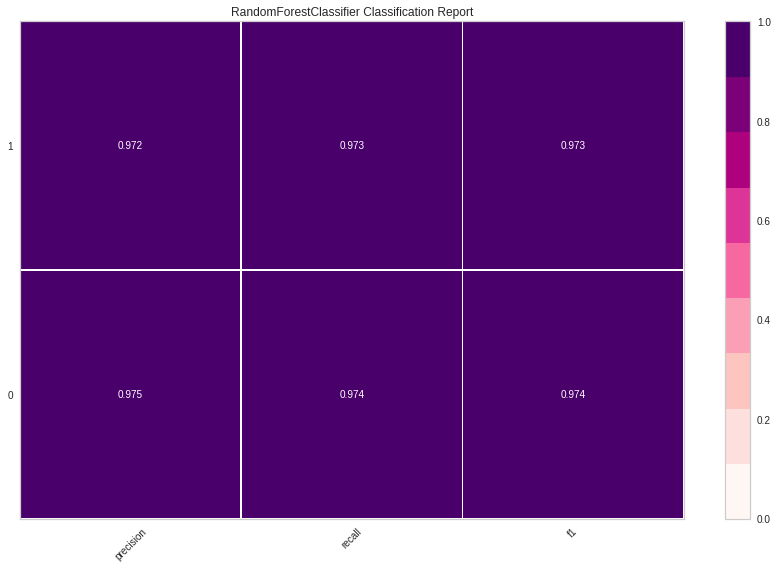

In [19]:
r = ClassificationReport(rfc, classes=["0", "1"], cmap='RdPu')
plt.figure(figsize=(12,8))
r.score(xtest, ytest)
c = r.poof()

#### Visualisation of Class Prediction Error

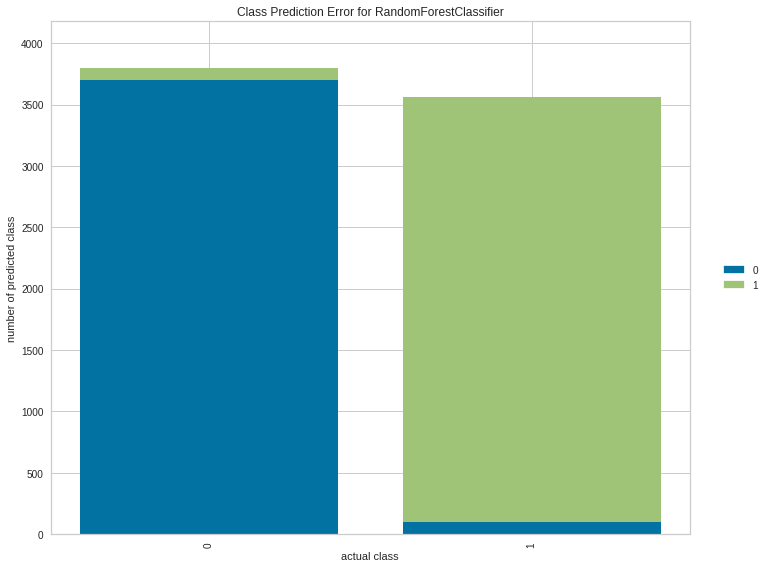

In [20]:
plt.figure(figsize=(12,8))
vis = ClassPredictionError(rfc, classes=["0","1"])
vis.fit(xtrain, ytrain)
vis.score(xtest, ytest)
# Show
vis.show()

#### ROC Curve for Random Forest Classifier

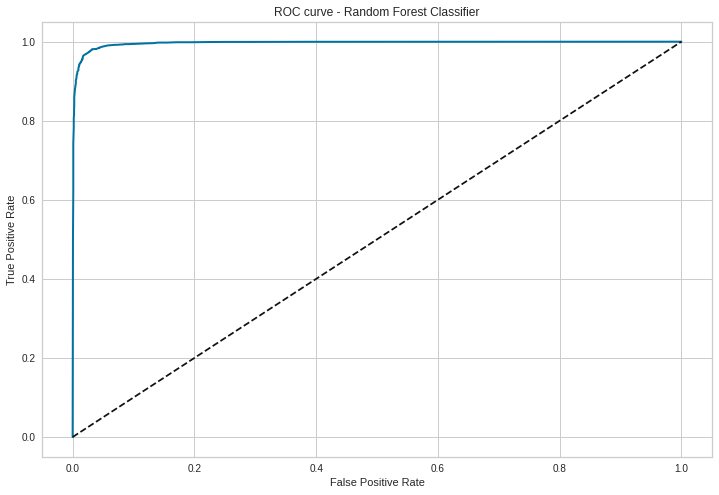

In [21]:
probs = rfc.predict_proba(xtest)
fpr, tpr, thresh = roc_curve(ytest, probs[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,'-b',linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve - Random Forest Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

## Modelling Using Dense ANN

### Model Creation

Model for 3 layer Dense ANN is created with previously mentioned features.

In [22]:
# Set random seed
tf.random.set_seed(42)

#We create the sequential model. 
classifier = Sequential()

# first hidden layer
classifier.add(Dense(units=100, kernel_initializer='he_uniform', activation='relu', input_dim=9))
# second hidden layer
classifier.add(Dense(units=10, kernel_initializer='he_uniform', activation='relu'))

# last layer (or output layer)
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='hard_sigmoid')) 

# taking summary of the layers
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,021
Trainable params: 2,021
Non-trainable params: 0
_________________________________________________________________


### Visualisation of the Network

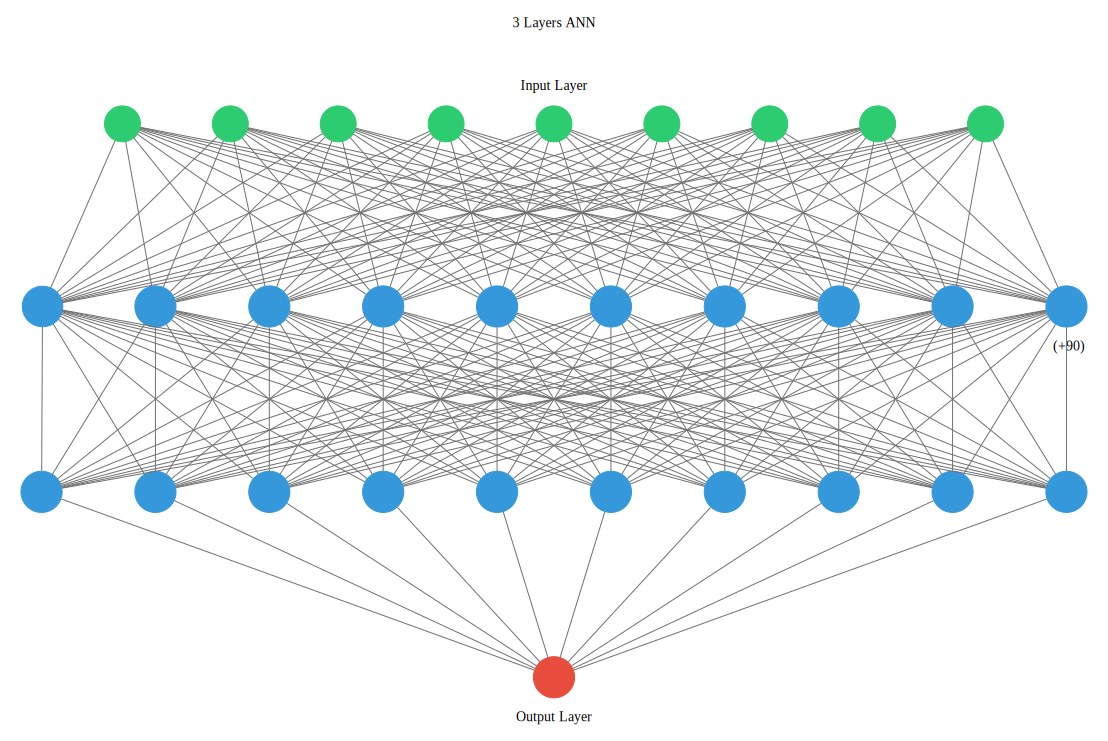

In [23]:
# Visualisation
ann_viz(classifier,filename='3_layers_nn.gv',title='3 Layers ANN')
graph = graphviz.Source.from_file('3_layers_nn.gv')
graph

### Model Compiling

Before proceeding to the training phase, model should be compiled. 
As of the loss function, the log(cosh(x)) is opted here. This mostly functions as the mean squared error, but it does not tend to be so strongly affected by occasional wildly wrong predictions. As of the Adam optimiser, was choosen for its low training costs and high performance (w.r.t. to models we have tried to implement in the backstage). 

[Source](https://www.tensorflow.org/api_docs/python/tf/keras/losses/log_cosh) [3]

## **Training & Testing**

In [24]:
classifier.compile(loss=tf.keras.losses.LogCosh(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.005),
                metrics=['binary_accuracy'])

# fitting the ANN to the training set
model = classifier.fit(xtrain, ytrain, batch_size=100, epochs=100)

y_pred = classifier.predict(xtest)
### Converting values
y_pred = 1*(y_pred > 0.5)

Epoch 1/100
172/172 [==============================] - 1s 2ms/step - loss: 0.0123 - binary_accuracy: 0.9662
Epoch 2/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0093 - binary_accuracy: 0.9742
Epoch 3/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0089 - binary_accuracy: 0.9747
Epoch 4/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0087 - binary_accuracy: 0.9755
Epoch 5/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0086 - binary_accuracy: 0.9757
Epoch 6/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0083 - binary_accuracy: 0.9771
Epoch 7/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0082 - binary_accuracy: 0.9770
Epoch 8/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0082 - binary_accuracy: 0.9775
Epoch 9/100
172/172 [==============================] - 0s 2ms/step - loss: 0.0080 - binary_accuracy: 0.9771
Epoch 10/100
172/172 [======

### Model Evaluation

In [25]:
# Evaluate our model on the test set
evaluations = classifier.evaluate(xtest, ytest)
print(f'loss: {evaluations[0]}, metric: {100*evaluations[1]}')


230/230 [==============================] - 1s 1ms/step - loss: 0.0124 - binary_accuracy: 0.9689
loss: 0.012410524301230907, metric: 96.88562750816345


Plotting the confusion matrix, Accuracy vs. Loss & Learning_Rate vs. Loss curves to measure the performance of the model.

#### Confusion Matrix

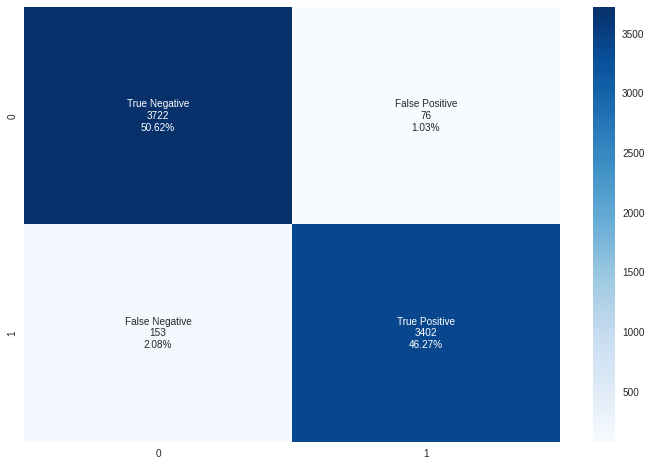

In [26]:
cm = confusion_matrix(ytest, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{0:0.0f}'.format(i) for i in cm.flatten()]
percent = ['{0:.2%}'.format(p) for p in cm.flatten()/np.sum(cm)]
details = [f'{j}\n{k}\n{l}' for j, k, l  in zip(labels, counts, percent)]
details = np.asarray(details).reshape(2,2)
plt.figure(figsize=(12,8))
sb.heatmap(cm, annot=details, fmt='', cmap='Blues')

dict_keys(['loss', 'binary_accuracy'])


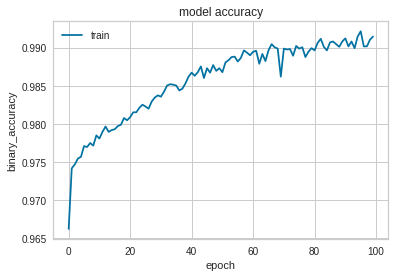

In [27]:
print(model.history.keys())
# summarize history for accuracy
plt.plot(model.history['binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

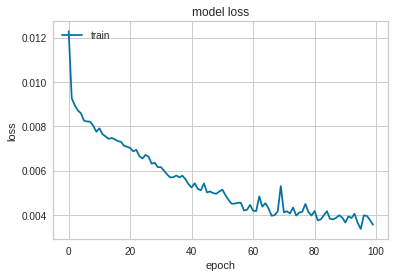

In [28]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### ROC Curve for Dense ANN

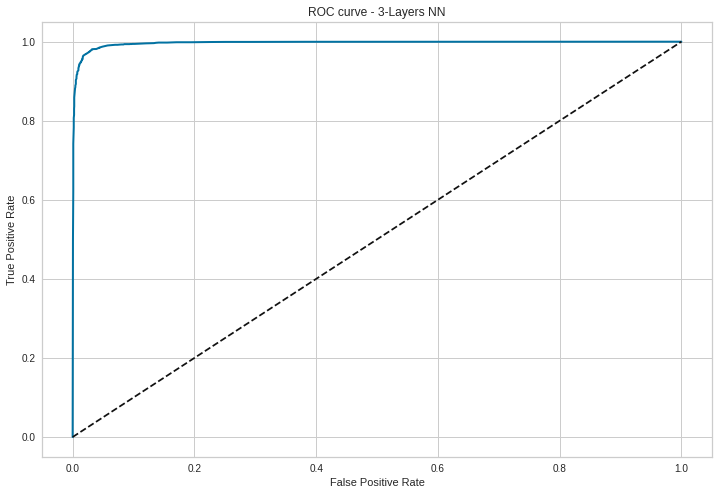

In [29]:
fpr, tpr, thresh = roc_curve(ytest, probs[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,'-b',linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve - 3-Layers NN')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

As the number of epochs increases, the model accuracy increases and the loss decreases.


#### Learning Curve

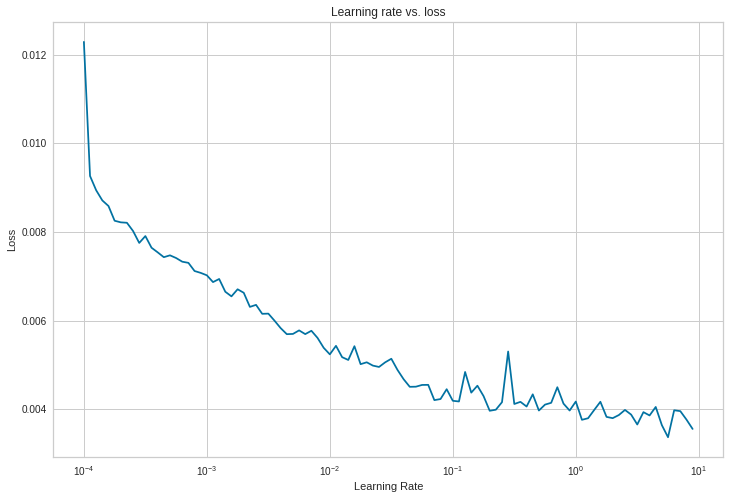

In [30]:
# Plot the learning rate versus the loss
learning_rate = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(12, 8))
# plt.ylim(bottom=0,top=0.001)
plt.semilogx(learning_rate, model.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

## Modelling Using Wide and Deep ANN

As stated by Cheng et al (2016)[4] Wide and Deep networks combine the benefits of memorisation (wide networks) and generalisation (deep networks). 
The wide model is a linear model including a set of sparse and crossed feature columns. This model is able to learn, with a high degree of efficiency, the interactions between sparse features. The Deep model wide & Deep neural networks are a combination of both types of networks, which allows the model to learn from wide and deep patterns. The wide and deep models are put together by summing up final output log odds as the prediction. Then, the prediction is fed to a logistic loss function.

Following the same steps as above, an implementation of a 5-layers Neural Net is done fro the task. For the output layer, at this stage a Lacun Normal initialiser and a sigmoid activation function. 

From [link](https://keras.rstudio.com/reference/initializer_lecun_normal.html) [5], It draws samples from a truncated normal distribution centered on 0 with stddev <- sqrt(1 / fan_in) where fan_in is the number of input units in the weight tensor.

### Model Creation

Model for 5 layer Dense ANN is created with previously mentioned features.

In [31]:
# creating model
wnd_classifier = Sequential()

# first hidden layer
wnd_classifier.add(Dense(units=100, kernel_initializer='he_normal', bias_initializer= 'zeros' , activation='relu', input_dim=9))
# second hidden layer
wnd_classifier.add(Dense(units=75, kernel_initializer='he_normal', bias_initializer= 'zeros', activation='relu'))
# third hidden layer
wnd_classifier.add(Dense(units=50, kernel_initializer='he_normal', bias_initializer= 'zeros', activation='relu'))
# fourth hidden layer
wnd_classifier.add(Dense(units=25, kernel_initializer='glorot_normal', bias_initializer= 'zeros', activation='relu'))
# last layer or output layer
wnd_classifier.add(Dense(units=1, kernel_initializer='lecun_normal', bias_initializer= 'zeros', activation='sigmoid'))

# taking summary of layers
wnd_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1000      
                                                                 
 dense_4 (Dense)             (None, 75)                7575      
                                                                 
 dense_5 (Dense)             (None, 50)                3800      
                                                                 
 dense_6 (Dense)             (None, 25)                1275      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 13,676
Trainable params: 13,676
Non-trainable params: 0
_________________________________________________________________


### Visualisation Of The Network

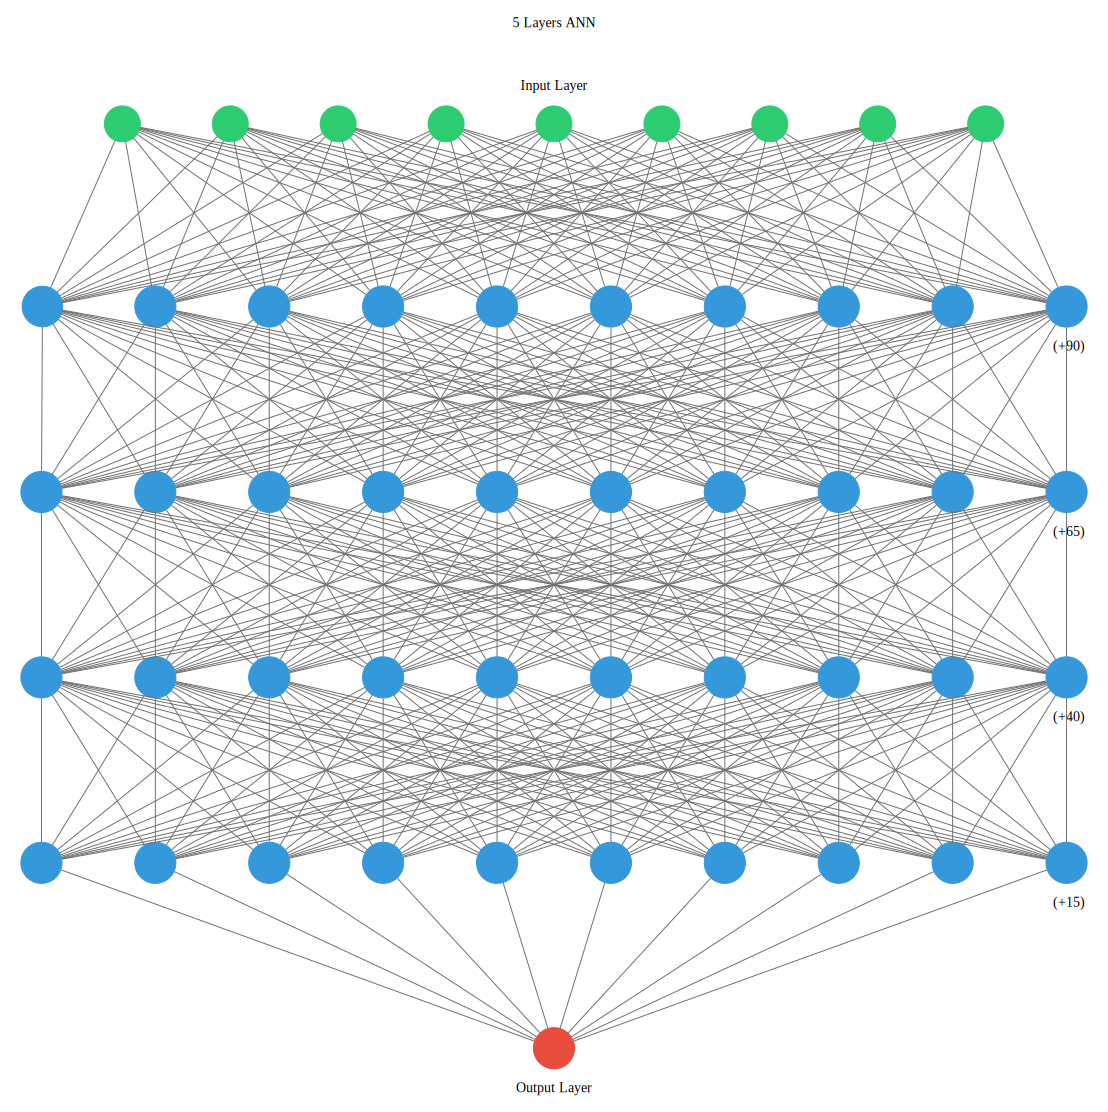

In [32]:
# Visualisation
ann_viz(wnd_classifier,filename='5_layers_nn.gv',title='5 Layers ANN')
graph = graphviz.Source.from_file('5_layers_nn.gv')
graph

### Model Compiling

In [ ]:
wnd_classifier.compile(loss=tf.keras.losses.LogCosh(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                   metrics=['accuracy'])
# fitting the ANN to the training set
model = wnd_classifier.fit(xtrain, ytrain, batch_size=100, epochs=100)

Epoch 1/100
172/172 [==============================] - 2s 3ms/step - loss: 0.0138 - accuracy: 0.9621
Epoch 2/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9742
Epoch 3/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9753
Epoch 4/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9765
Epoch 5/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9771
Epoch 6/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9782
Epoch 7/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9795
Epoch 8/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9804
Epoch 9/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9800
Epoch 10/100
172/172 [==============================] - 0s 3ms/step - loss: 0.0069 - accura

### Training

### Testing

In [34]:
y_pred_proba = wnd_classifier.predict(xtest)
# converting values
y_predi = 1*(y_pred_proba > 0.5)

### **Model Evaluation**

In [35]:
evaluations = wnd_classifier.evaluate(xtest, ytest)
print(evaluations)
print(f'loss: {evaluations[0]}, Accuracy: {100*evaluations[1]}')

230/230 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9709
[0.012037927284836769, 0.9708962440490723]
loss: 0.012037927284836769, Accuracy: 97.08962440490723


#### Confusion Matrix

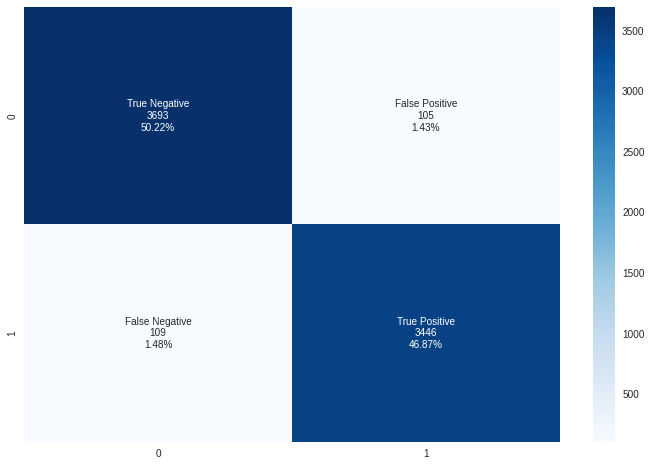

In [36]:
cm = confusion_matrix(ytest, y_predi)
plt.figure(figsize=(12,8))
labels = ['True Negative','False Positive','False Negative','True Positive']
counts = ['{0:0.0f}'.format(i) for i in cm.flatten()]
percent = ['{0:.2%}'.format(p) for p in cm.flatten()/np.sum(cm)]
details = [f'{j}\n{k}\n{l}' for j, k, l  in zip(labels, counts, percent)]
details = np.asarray(details).reshape(2,2)

#plot
sb.heatmap(cm, annot=details, fmt='', cmap='Blues')

#### ROC Curve for Wide & Deep

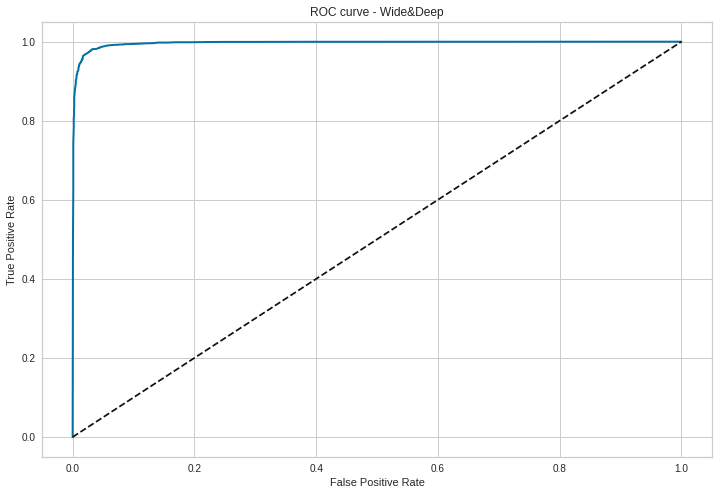

In [37]:
fpr, tpr, thresh = roc_curve(ytest, probs[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,'-b',linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve - Wide&Deep')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#### Learning Curve

Text(0.5, 1.0, 'Learning Curves - Wide&Deep NN')

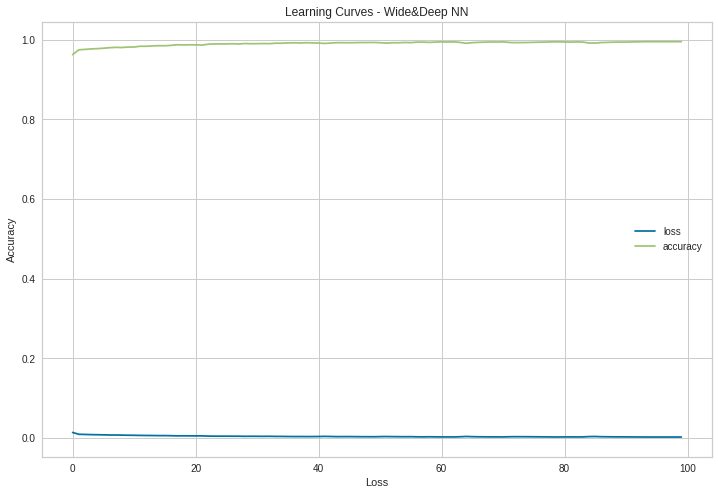

In [38]:
pd.DataFrame(model.history).plot(figsize=(12,8))
plt.xlabel("Loss")
plt.ylabel("Accuracy")
plt.title("Learning Curves - Wide&Deep NN")

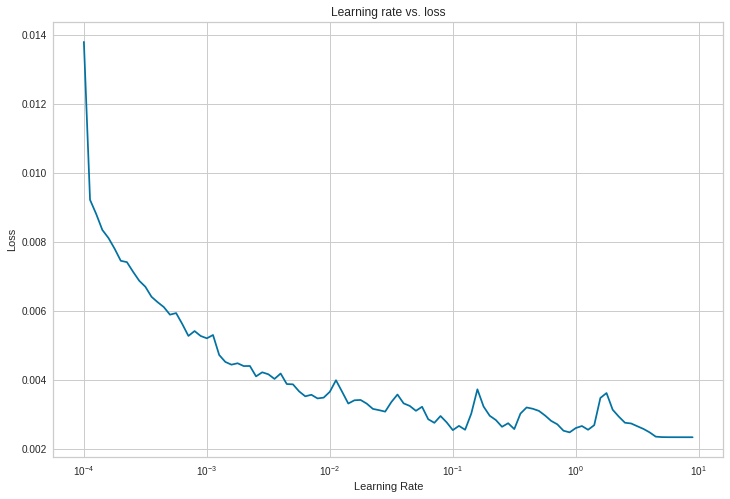

In [39]:
# Plot the learning rate versus the loss
learning_rate = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(12, 8))
# plt.ylim(bottom=0,top=0.001)
plt.semilogx(learning_rate, model.history["loss"])
# We want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

# Results and Discussion

### Comparison of the Models

#### Kaggle Scores:

|Model|Kaggle Score|
|---|---|
|Random Forest Classifier|2.07234|
|3 Layer Dense ANN|0.75712|
|5 Layer Wide & Deep ANN|0.00|


#### Performance on Training Set (loss, accuracy):

|Model|Loss|Accuracy|
|---|---|---|
|Random Forest Classifier|0.08545|0.9217|
|3 Layer Dense ANN|0.0115|0.9711|
|5 Layer Wide & Deep ANN|0.0095|0.9864|

Even though the evaluation metrics, LogCosh and binary accuracy, results for 5 layer Wide and Deep ANN seems lower than the other models, The kaggle score for the Wide and Deep model, seems to have a better score than the rest. hence it can be suggested to use this as the best model from these set of models.

While playing around with difeferent parameters for the neural network design the learning rate parameter had the most influence in the performance of the models. While increasing the learning rate from 0.0001, which seemed as the default value, the change of performance was very much visible. But, too much increase of this parameter also resulted in bad performance. So it was was finalised to have an optimum value of 0.005 for this parameter.

Adding to this using relu function as the activation for the inner layers will have an advantage of faster learning in the initial stages.

He_uniform (uniform distribution): This initialiser draws samples from a uniform distribution within -limit, limit where limit is sqrt(6 / fan_in) and fan_in` is the number of input units in the weight tensor.
[Source](https://tensorflow.rstudio.com/reference/keras/initializer_he_uniform/) [6]

Glorot_uniform (uniform distribution): Initialises the weights in a way that makes the variance consistent across layers. This consistency in the variance acts such that the gradient is prevented from either exploding or vanishing.



## Save and store the predictions

In [40]:
df = pd.read_csv('test_100r.csv')
df = df.drop(columns = ['id'])
df = df.dropna()
df = pd.read_csv('test_100r.csv')
df = df.drop(columns = ['id'])
df = df.dropna()
df = df.loc[:, corr[1:10].index]
sc = StandardScaler()
df = sc.fit_transform(df)

df = pd.DataFrame(df)
df.head()

0         1         2         3         4         5         6  \
0 -1.038830 -1.266871 -1.029658 -1.054599 -1.320139 -1.645708 -0.171977   
1 -1.150897 -0.637167 -0.712118 -1.334297 -0.459994 -0.242543 -0.967737   
2  2.405487  0.694111 -0.558375  1.596709 -1.228659  0.446130  0.584018   
3 -0.680552 -1.324230 -0.900948 -0.042276 -0.613095  0.031941  0.355765   
4  1.559374  0.066940 -0.429124 -0.577046 -0.605798 -0.523716  1.928025   

          7         8  
0 -0.243879 -1.298598  
1 -1.337613 -0.640079  
2  2.382894  1.597472  
3 -0.745449  0.891177  
4  0.629340  1.085078

In [41]:
models = [rfc, classifier, wnd_classifier]
for count, item in enumerate(models):
  y_pred_probability = item.predict(df)

  # converting values
  y_pred = 1*(y_pred_probability>.5)
  df['id'] = df.index
  df['diagnosis'] = y_pred_probability
  df[['id','diagnosis']].to_csv(f'{count}.csv',index=False)
  df.drop(['id','diagnosis'],axis=1,inplace=True)

# Summary and Recommendation

Initially the analysis started with the implementation of a Random Forest Classifier, which gave an accuracy of 97%. The risk with Random Forest Classification is, however, to fall into overfitting and have a poor out of sample performance. Then, a 3-layers neural net was built. Finally, the analysis presents the implemention of a Wide&Deep NN, which gives the best results. 

One of the issues that could occur with the 3  layer neural network implemented here is the slow learning rate. It may take a long time for the errors to converge to a min value and the number of epochs may not be sufficient for this. This can be overcome with the 5 layer wide and deep neural network with a better learning rate, which helps in a faster convergence on the errors.

As of the features, the investigation shows that they are all statistically significant in determining the probability of a malignant diangosis. One important factor to be wary of is the presence of correlation between variables. For example, if a cancerogenous body presents a large perimeter, we would also expect it to be spread over a large area. This high correlation could lead the model to suffer from collinearity, which could undermine the explanatory power of the features set and lead to biased results (that does not seem to be the case for this analysis). 

Another important factor to consider is the threshold used, for example, in the RFC to separate between a malignant and a benign diagnosis, as the risk of a misdiagnosis due to a small margin of separation, in real terms, could lead to serious consequences. Other factors, which are not included in the dataset, could help to build a relatively safer and more inclusive model, such as personal and observable characteristics as a dummy for previous cases of cancer in the family, risks factors, age of the patient - or of data coming from other steps of the medical procedure (e.g. antibodies count etc.) which are known as determinants of this specific disease.



# References


[1] Macaulay BO, Aribisala BS, Akande SA, Akinnuwesi BA, Olabanjo OA. Breast cancer risk prediction in African women using Random Forest Classifier. Cancer Treat Res Commun. 2021;28:100396. doi: 10.1016/j.ctarc.2021.100396. Epub 2021 May 15. PMID: 34049004.

[2] Kirasich, K., Smith, T., & Sadler, B. (2018). Random forest vs logistic regression: binary classification for heterogeneous datasets. SMU Data Science Review, 1(3), 9.

[3] https://www.tensorflow.org/api_docs/python/tf/keras/losses/log_cosh

[4] Cheng, H. T., Koc, L., Harmsen, J., Shaked, T., Chandra, T., Aradhye, H., ... & Shah, H. (2016, September). Wide & deep learning for recommender systems. In Proceedings of the 1st workshop on deep learning for recommender systems (pp. 7-10).

[5] https://keras.rstudio.com/reference/initializer_lecun_normal.html

[6] https://tensorflow.rstudio.com/reference/keras/initializer_he_uniform/